# Monte Carlo - value of $\pi$


## Introduction

In this activity, we are going to investigate a method to calculate some decimals of $\pi$. This method is the so-called Monte Carlo algorithm. After determining the first 6 decimals of $\pi$, we will apply the method to other problems, such as: determining the volume of sphere, the area of an ellipse, and the value of $\ln(2)$. 

*Monte Carlo algorithm.* The idea is the following. Imagine you have a circle of radius $r=1$ inscribed in a square of length $a=2r=2$. The area of the square is then $A=4$. Imagine we don't know the decimal value of $\pi$, but we know that the area inside the cirle is $S=\pi r^2 = \pi$. In order to find the value of $\pi$, it suffices to know the ratio between the two areas: $\frac{S}{A} = \frac{\pi}{4}$. If we know $S/A$, then we just multiply the ratio by 4 and find the value of $\pi$. Now, how do we find the ratio $S/A$? Well, imagine that a crazy teacher is looking at the circle and the square from above and, for some reason, decide to drop a bunch of sand uniformly in the square. The teacher decide to count the number $N_1$ of grains of sand inside the circle and compare with the total number of grains of sand in the square $N$. The sands are randomly spreaded in the square but because we assume they were homogeneously dropped, we expect that the ratio between the number of grains in the circle with the total number of grains to be equal to the ratio between the area of the two surfaces:
$$
\frac{N_1}{N} = \frac{S}{A}\ .
$$
Hence, after counting $N_1$ and $N$, we can determine the value of $\pi$ using the following relation:
$$
\pi = 4\times \frac{S}{A}\ .
$$
In order to count the number $N_1$ of grains of sand inside the circle, we check whether the distance between the grains of salt and the center of the sphere are less than the radius of the circle $C(O;1)$ of radius $r=1$ and centered at $O(0,0)$. Let $M(x,y)$ be a point. Then $M\in C(O;1)$ if $OM = \sqrt{x^2+y^2}\leq 1$. 

Let's start with drawing a circle inscribed in a square. 

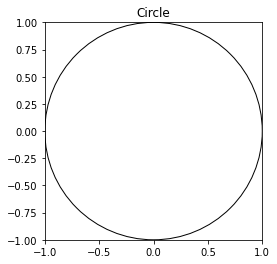

In [ ]:
import matplotlib.pyplot as plt # we first import matplotlib.pyplot

figure, axes = plt.subplots() # 
circle = plt.Circle( (0, 0 ),1 ,fill = False ) # we define the parameter of the circle and give him a name
plt.xlim( -1 , 1 ) # we set the boundaries of the box for x and y
plt.ylim( -1 , 1 ) 
axes.set_aspect( 1 ) # 
axes.add_artist( circle ) # 
plt.title( 'Circle' ) # we give a title
plt.show() # we show the plot

## Monte Carlo Algorithm

Now we can write the code using our Monte Carlo algorithm.

In [ ]:
# We first import numpy and random
import numpy as np
import random as rand

# We give the value N of dots we want to generate
N=1000000
# The initial number of dots in the circle is n=0. In what follows, n stands for the number of dots 
n=0 
# Now we start the loop to generate N dots randomly
for k in range(N):  
  x = rand.uniform(-1,1) # We generate the x-coordinate
  y = rand.uniform(-1,1) # We generate the y-coordinate
  r = np.sqrt(x**2 + y**2) # We generate the x-coordinate
  if r<=1: # We check the condition r<=1. 
    n=n+1 # If that's true, then we increase the value of n by 1
  k=k+1 # Once the condition has been checked, we can increment k and continue to run the loop
A = 4*n/N # We close the loop and calculate the value of the area of the circle (which hopefully is close to pi)
print(A) # We print the value of the estimated value of pi
print(np.pi) # We print the actual value of pi
print(100*(np.pi - A)/np.pi)


3.141768
3.141592653589793
-0.005581449587565581


We can show the dots in our figure. For that, we can simply combine the two programs above. We take $N=100$ so that we can see the dots. 

3.066666666666667
3.141592653589793
2.3849682369708503


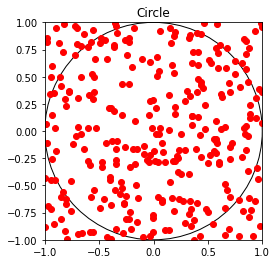

In [ ]:
# We first import numpy, random, matplotlib.pyplot
import numpy as np
import random as rand
import matplotlib.pyplot as plt 


N=300
n=0 
Lx=[] # we create an empty list to collect the values of x of the dots that will be generated randomly hereafter
Ly=[] # we create an empty list to collect the values of y of the dots that will be generated randomly hereafter
for k in range(N):  
  x = rand.uniform(-1,1) # We generate the x-coordinate
  y = rand.uniform(-1,1) # We generate the y-coordinate
  Lx.append(x)  # We add the above x-value to the list Lx
  Ly.append(y)  # We add the above y-value to the list Ly
  r = np.sqrt(x**2 + y**2) 
  if r<=1: 
    n=n+1
  k=k+1 
A = 4*n/N 
print(A) 
print(np.pi) 
print(100*(np.pi - A)/np.pi)

figure, axes = plt.subplots() # 
circle = plt.Circle( (0, 0 ),1 ,fill = False ) 
plt.xlim( -1 , 1 ) 
plt.ylim( -1 , 1 ) 
axes.set_aspect( 1 ) #
axes.add_artist( circle ) # 
plt.plot(Lx, Ly, 'o', color='red'); # We plot the dots Lx vs Ly from the list
plt.title( 'Circle' ) # we give a title
plt.show() # we show the plot

# Determining the area of an ellipse


## Method

Inverse problem: we assume that $\pi$ is known. We want to determine what is the coefficient $\alpha$ so that the surface of the circle $S = \alpha \times \pi $, for a circle of radius r.  

In [ ]:
import numpy as np
import random as rand
N=100000
S=0
R=2
for n in range(N+1):
  x = R*rand.uniform(-1,1)
  y = R*rand.uniform(-1,1)
  rad = np.sqrt(x**2 + y**2)
  if rad<=R:
    S=S+1
  n=n+1
A=4* R**2 *S/N
alpha = A/np.pi
print(alpha)


3.9942033814159945


We can also use this approach to find the area of an ellipse. The equation of an ellipse is:
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1\ ,
$$
where $a>0$ is the semi-major axis and $b>0$ is the semi-minor axis. Notice that when $a=b$, the ellipse is a circle of radius $r=a$. 

The condition for a point $M(x,y)$ to be inside the ellipse is:
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}\leq 1\ .
$$
To estimate the surface area, it suffices to multiply the area of the rectangle $4ab$ by the ratio of the number of dots in the ellipse by the number of dots in the rectangle:
$$
S = \frac{N_1}{N} \times 4ab
$$
Notice that the actual surface area is:
$$
S_{actual} = \pi ab\ .
$$


In [ ]:
import numpy as np
import random as rand
N=1000000
n=0
a=2
b=1
for k in range(N+1):
  x = rand.uniform(-a,a)
  y = rand.uniform(-b,b)
  rad = np.sqrt((x/a)**2 + (y/b)**2)
  if rad<=1:
    n=n+1
  k=k+1
S = 4*a*b * n/N
Sactual = np.pi * a*b
print(S,Sactual)

6.280976 6.283185307179586


It works! 

## Problem: area of a heart shape

One of the model to represent a beautiful heart shape is the following cartesian equation:
$$
x^2+(y-(x^2)^{1/3})^2=1\ .
$$
We consider the heart shape to be in a squared shaped box defined by $-1\leq x\leq 1$ and $-1.2\leq y \leq 1.6\ $.  

**Problem: using the Monte Carlo algorithm, find the area of the heart shape.** 

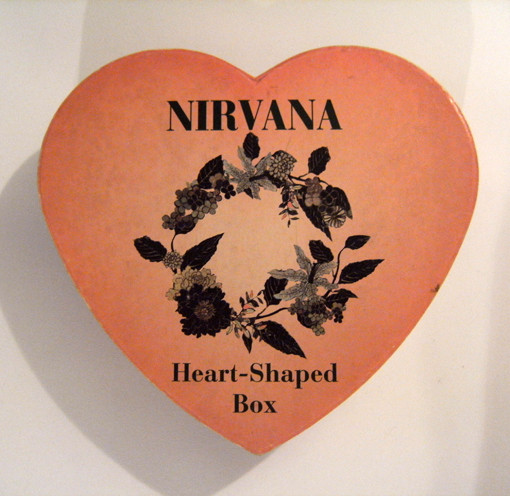

# Determining the volume of a sphere

## Method

Now we can extend this approach to a 3D problem. Let's prove that the volume of a sphere is $V=\frac{4}{3}\pi R^3$. 

Let's assume that the volume of a sphere $S(0;1)$ of radius $r=1$ and centered at $O(0,0,0)$ can be written as $V = \alpha \pi R^3 $. How can we determine the value of the coefficient $\alpha$? The idea is very similar, we generate $N$ dots randomly distributed in a cube of length $a=2r=2$. The volume of the cube is $a^3 = 8$. The ratio between the dots in the sphere and in the cube is then
$$
\frac{N_1}{N} = \frac{V}{8} = \frac{\alpha}{8}\pi r^3 = \frac{\alpha}{8} \pi\ .
$$
After counting $N_1$ and $N$, we find the value of $\alpha$ to be:
$$
\alpha = \frac{8}{\pi}\frac{N_1}{N}\ .
$$

In order to count the number $N_1$ of dots inside the sphere, we check whether the distance between the dots and the center of the sphere is less than the radius of the sphere. Let $M(x,y,z)$ be a point. Then $M\in S(0;1)$ if $OM = \sqrt{x^2+y^2+z^2}\leq 1$. 

Notice that we expect $\alpha$ to be $4/3 = 1.333⋯$

In [ ]:
import numpy as np
import random as rand
N=1000000
S=0
R=1
for n in range(N+1):
  x = R*rand.uniform(-1,1)
  y = R*rand.uniform(-1,1)
  z = R*rand.uniform(-1,1)
  rad = np.sqrt(x**2 + y**2 + z**2)
  if rad<=R:
    S=S+1
  n=n+1
A=8* R**3 *S/N
alpha = A/np.pi
print(alpha)


1.3302730369020297


We obtain something closed to 4/3, which is what we expect. 

## Problem: volume of a martini glass

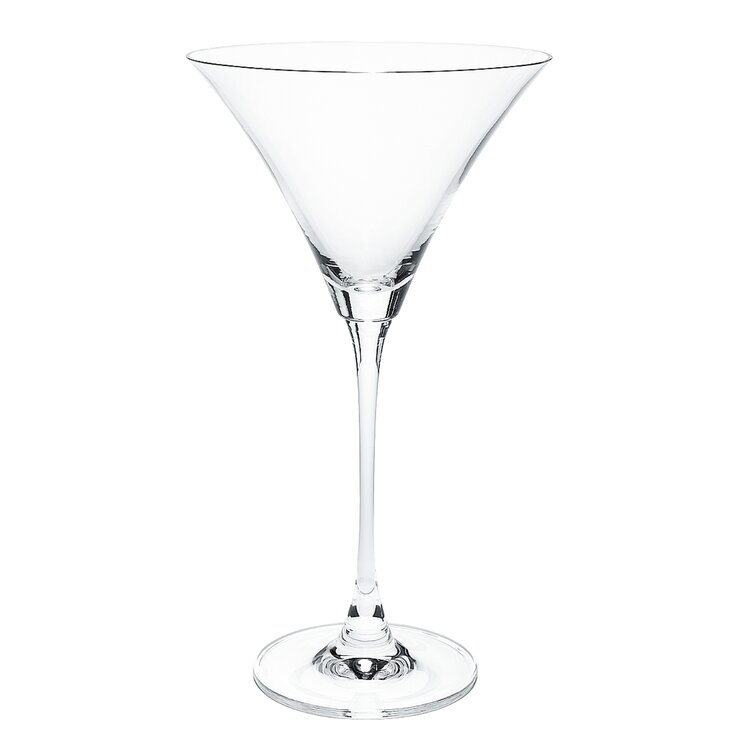

There are different shapes of martini glass, but my favorite one is given by this cartesian equation:
$$
e^{2z/5}-x^2-y^2=0.1
$$
The equation above represent the part of the glass that can be filled with some liquid (could be water, milk, or anything you want on Friday evening after work). 

The glass is stored in a box given by $-1.5\leq x \leq 1.5$,  $-1.5\leq y \leq 1.5$ ,  $-8\leq z \leq 2\ $ .    

**Problem: find the volume of the liquid that can contain the martini glass**

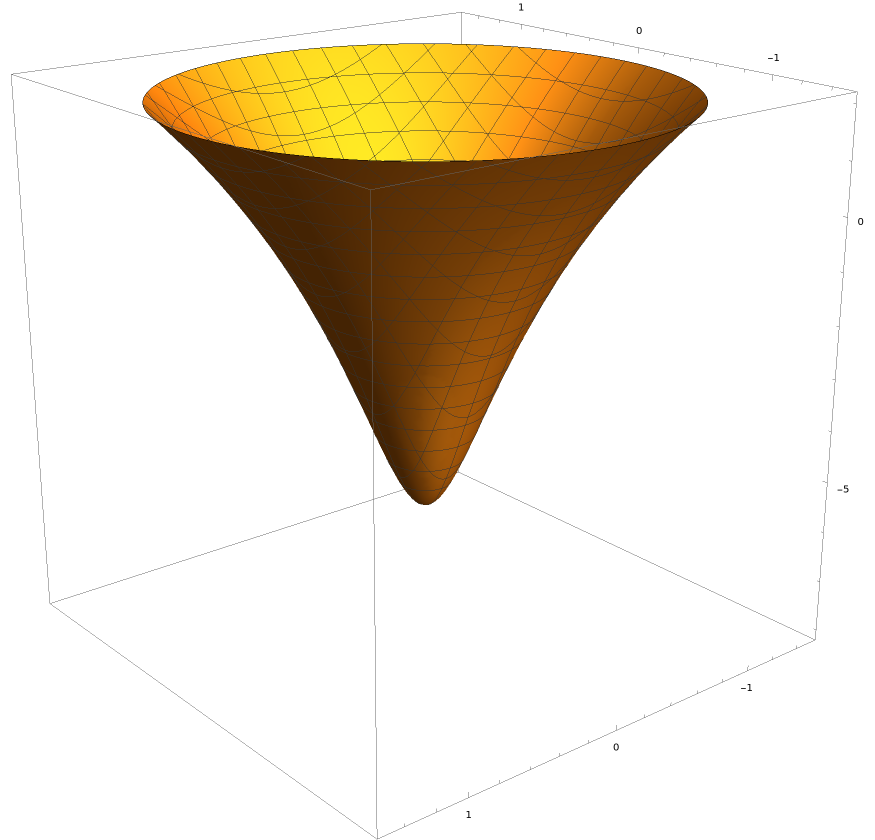

#*Determining the value of $\ln(2)$*

We know that 
$$
\ln(2) = \int_{1}^{2}\frac{1}{x}dx
$$
which means that the area between the curve of $1/x$ and the $x$-axis equals $\ln(2)$. 

The idea is basically the same as before. Let a square of length $1$ .. The area of the square equals $1^2=1$. If we generate $N$ dots randomly distributed in the square. Then the probability of that a dot is below the curve representative of $1/x$ is the ratio between the area below the curve and the area of the square: 
$$
p = \frac{A}{1} = \frac{\ln(2)}{1} = \ln(2)
$$
Hence, the expected value for the number of dots below the curve is $E(X) = Np$. After counting the number $N_1$ of dots below the curve, we can then assume that 
$$
N_1 = Np = n\ln(2) \Rightarrow \ln(2) = \frac{N_1}{N}\ .
$$ 
To determine whether a dot of coordinates $(x,y)$ is below the curve, it suffices to check that $y\leq 1/x$. 

In [ ]:
import random as rand
import numpy as np

N=1000000
n=0
for k in range(N+1):
  x = rand.uniform(1,2)
  y = rand.random()
  if y<=1/x:
    n=n+1
  k=k+1
est=n/N
print(est)
real=np.log(2)
print(real)
error = (np.abs(real-est)/real) *100
print(error)


0.693245
0.6931471805599453
0.014112362106947093


We can calculating the percent error between the estimated value $x_{est}$ and the actual value:
$$
\epsilon = 100\times\frac{|x_{est}-\log(2)|}{\log(2)}
$$
for different values of $N=10^p$, where $p=1,2,3,4,5,6,7,8$. 

In [ ]:
import random as rand
import numpy as np

def est(p):
  N=10**p
  n=0
  for k in range(N+1):
    x = rand.uniform(1,2)
    y = rand.random()
    if y<=1/x:
      n=n+1
    k=k+1
  est=n/N
  return(est)

for p in range(1,8):
  N=10**p
  real=np.log(2)
  x = est(p)
  error = (np.abs(real-x)/real) *100
  theor = 100 /(np.sqrt(N))
  print(p, error, theor)

1 0.9886528622274355 31.622776601683793
2 4.782127301328408 10.0
3 1.5657308785830215 3.1622776601683795
4 0.25287839137406504 1.0
5 0.05153026225349831 0.3162277660168379
6 0.06792488713209918 0.1
7 0.007528063506384973 0.03162277660168379


**Problem:** Using a similar method, find the value of $\ln(5)$.  

# Determining the area below a curve


## Method

Let $f(x) = e^{\sin(x)}$. We don't know any explicit undefinite integral of this function. However, using the Monte Carlo algorithm, we can have a pretty good estimate of the value of the intgeral between $0$ and $3\pi$. We inscribe the curve in a larger rectangle of dimension $5 \times 3\pi$. 

In [ ]:
import random as rand
import numpy as np

N=1000000
n=0
for k in range(N+1):
  x = rand.uniform(0,3*np.pi)
  y = rand.uniform(0,5)
  if y<=np.exp(np.sin(x)):
    n=n+1
  k=k+1
S = (n/N) * 15*np.pi
print(S)

14.151209860315618


Using other numerical method (Euler), we find: 14.1637 (makes sense as the percent error is of the order of $\frac{1}{\sqrt{N}} = 0.1\%$)

## Problem

Consider the functions
$$
f(x) = e^{-x^4+x^2},\ -2\leq x\leq 2 
$$
and 
$$
g(x) = \cos^2(x^4) e^{-x},\ 0\leq x\leq 2.5
$$

**Problem:**

**1.   Graph these two functions in their respective domain**

**2.   Calculate the area below the two curves**


